In [41]:
# %load src/Graph.py
from collections import defaultdict
import random
import numpy as np


class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = defaultdict(list)
        self.distances = {}

    def add_node(self, value):
        self.nodes.add(value)

    def add_nodes(self, list):
        for node in list:
            self.add_node(node)

    def add_edge(self, from_node, to_node, distance):
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.distances[(from_node, to_node)] = distance
        self.distances[(to_node, from_node)] = distance

    def add_edges(self, tuples):
        for t in tuples:
            self.add_edge(t[0], t[1], t[2])

    def remove_edge(self, edge):
        if self.distances.get(edge):
            self.edges[edge[0]].remove(edge[1])
            self.edges[edge[1]].remove(edge[0])
            self.distances.pop(edge)

    def remove_edges(self, edges):
        for edge in edges:
            self.remove_edge(edge)

    def remove_node(self, node):
        for n in self.nodes:
            if(node != n):
                self.remove_edge((node, n))
        self.nodes.remove(node)

    def remove_nodes(self, nodes):
        for node in nodes:
            self.remove_node(node)
    
    def random_graph(self, num_nodes, prob_axis):
        g = Graph()
        g.add_nodes(range(num_nodes))
        for source in g.nodes:
            for target in g.nodes:
                if (source != target and random.random() < prob_axis and (not g.distances.get((source, target)))):
                    g.add_edge(source, target, random.randint(1, num_nodes))
        return g
        #self.nodes = g.nodes
        #self.edges = g.edges
        #self.distances = g.distances
    
    def adjacency_matrix(self):
        length = len(self.nodes)
        matrix = np.full((length, length), np.inf)
        for source in self.nodes:
            for target in self.nodes:
                if(self.distances.get((source, target))):
                    matrix[source][target] = self.distances.get((source, target))
        return matrix

    def dijkstra(self, initial):
        visited = {initial: 0}
        path = {}

        nodes = set(self.nodes)

        while nodes:
            min_node = None
            for node in nodes:
                if node in visited:
                    if min_node is None:
                        min_node = node
                    elif visited[node] < visited[min_node]:
                        min_node = node

            if min_node is None:
                break

            nodes.remove(min_node)
            current_weight = visited[min_node]

            for edge in self.edges[min_node]:
                weight = current_weight + self.distances.get(min_node, edge)
                if edge not in visited or weight < visited[edge]:
                    visited[edge] = weight
                    path[edge] = min_node

        return visited, path
    
    def floyd_warshall(self):
        size = len(self.nodes)
        distances = self.distances
        for k in range(0, size):
            for i in range(0, size):
                for j in range(0, size):
                    distances[(i,j)] = min(distances.get(i,j), distances.get(i,k) + distances.get(k,j))
        return distances

    


In [46]:
import networkx as nx

graph = Graph()
g = graph.random_graph(4, .5)

adj_matrix = g.adjacency_matrix()

print(adj_matrix)

#graph_plot=nx.from_numpy_matrix(adj_matrix, parallel_edges=False)

#nx.draw(graph_plot)

[[inf  1.  4.  2.]
 [ 1. inf  3.  1.]
 [ 4.  3. inf  4.]
 [ 2.  1.  4. inf]]


In [47]:
g.distances = g.floyd_warshall()
print(g.adjacency_matrix())

[[inf  1.  2.  3.]
 [inf  1.  2.  3.]
 [inf  1.  2.  3.]
 [inf  1.  2.  3.]]


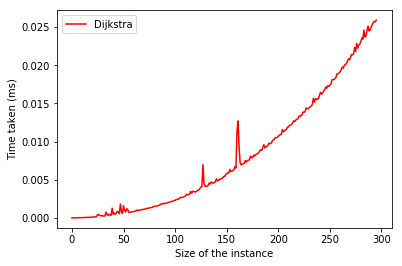

In [21]:
import time
import matplotlib.pyplot as plt

prob = .75
size = 300
dijkstra = []
sizes = range(4, size)
graph = Graph()

for i in sizes:
    graph.random_graph(i, prob)
    start = time.time()
    graph.dijkstra(1)
    end = time.time()
    dijkstra.append(end - start)

# Axis for the tokens
x_axis = np.arange(len(sizes))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Size of the instance', color='k')
ax.set_ylabel('Time taken (ms)', color='k')
#ax.grid(linewidth=0.05)
ax.plot(x_axis, np.array(dijkstra), '-', color='r', label='Dijkstra')

ax.legend(loc='upper left')


# Plot

#plt.tight_layout()
#plt.savefig('comparison.pdf', format='pdf', dpi=300)
